<a href="https://colab.research.google.com/github/oktavian-ramadhani/data-analyst/blob/FUNDAMENTAL-DATA-ANALYST/KLASIFIKASI_BREAST_CANCER_WISCONSIN%2C_Memprediksi_apakah_tumor_GANAS_(M)_atau_JINAK_(B).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KLASIFIKASI BREAST CANCER WISCONSIN, Memprediksi apakah tumor GANAS (M) atau JINAK (B)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, RocCurveDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
df = pd.read_csv('sample_data/data.csv')

In [ ]:
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Jumlah baris: 569
Jumlah kolom: 33


In [ ]:
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [ ]:
# Cek tipe data kolom
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Cek apakah ada data kosong (missing values)
print("Jumlah data kosong per kolom:")
print(df.isnull().sum())

Jumlah data kosong per kolom:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_d

In [ ]:
#Hapus kolom yang tidak dibutuhkan (misalnya 'id' dan 'Unnamed: 32' jika ada)
df = df.drop(columns=['id'], errors='ignore')
df = df.drop(columns=['Unnamed: 32'], errors='ignore')

In [ ]:
#Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [ ]:
# Diagnosis: B = Benign (jinak), M = Malignant (ganas)
# Ubah kategori menjadi angka untuk model
le = LabelEncoder()
y = le.fit_transform(y)   # B=0, M=1

In [ ]:
#Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Membuat model Decision Tree
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [ ]:
#Melatih model
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [ ]:
#Prediksi data uji
y_pred = model.predict(X_test)

# **EVALUASI HASIL**

In [ ]:
#Evaluasi hasil
print("Akurasi model:", accuracy_score(y_test, y_pred))
print("\n" + "="*60)

print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=['Jinak', 'Ganas']))

print("\n" + "="*60)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Akurasi model: 0.9473684210526315

Laporan Klasifikasi:
              precision    recall  f1-score   support

       Jinak       0.93      0.99      0.96        71
       Ganas       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114


Confusion Matrix:
[[70  1]
 [ 5 38]]


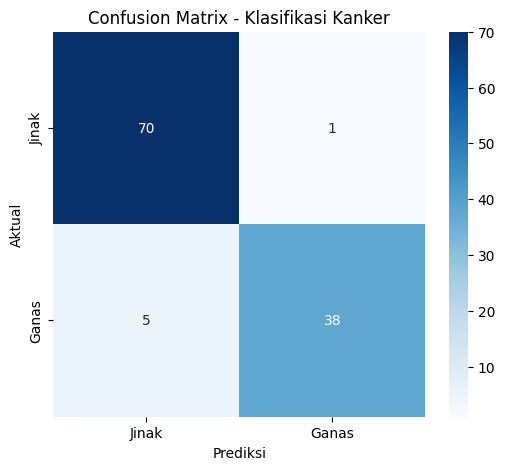

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt="d", cmap="Blues",
            xticklabels=['Jinak', 'Ganas'],
            yticklabels=['Jinak', 'Ganas'])
plt.title("Confusion Matrix - Klasifikasi Kanker")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

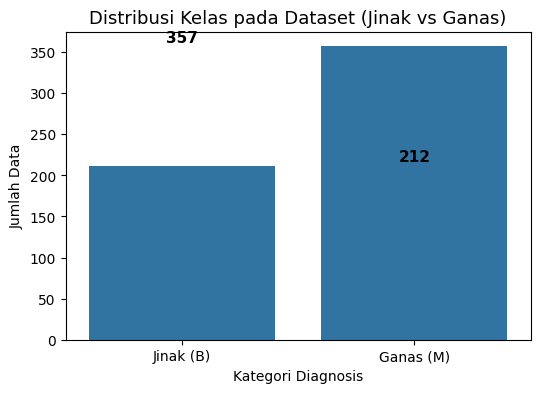

In [ ]:
# Hitung jumlah masing-masing kategori
jumlah_kelas = df['diagnosis'].value_counts()

plt.figure(figsize=(6,4))
ax = sns.countplot(x='diagnosis', data=df)

# Tambahkan label nominal di atas batang
for i, v in enumerate(jumlah_kelas):
    ax.text(i, v + 5, str(v), color='black', ha='center', fontweight='bold', fontsize=11)

plt.title("Distribusi Kelas pada Dataset (Jinak vs Ganas)", fontsize=13)
plt.xlabel("Kategori Diagnosis")
plt.ylabel("Jumlah Data")
plt.xticks(ticks=[0, 1], labels=['Jinak (B)', 'Ganas (M)'])
plt.show()



---



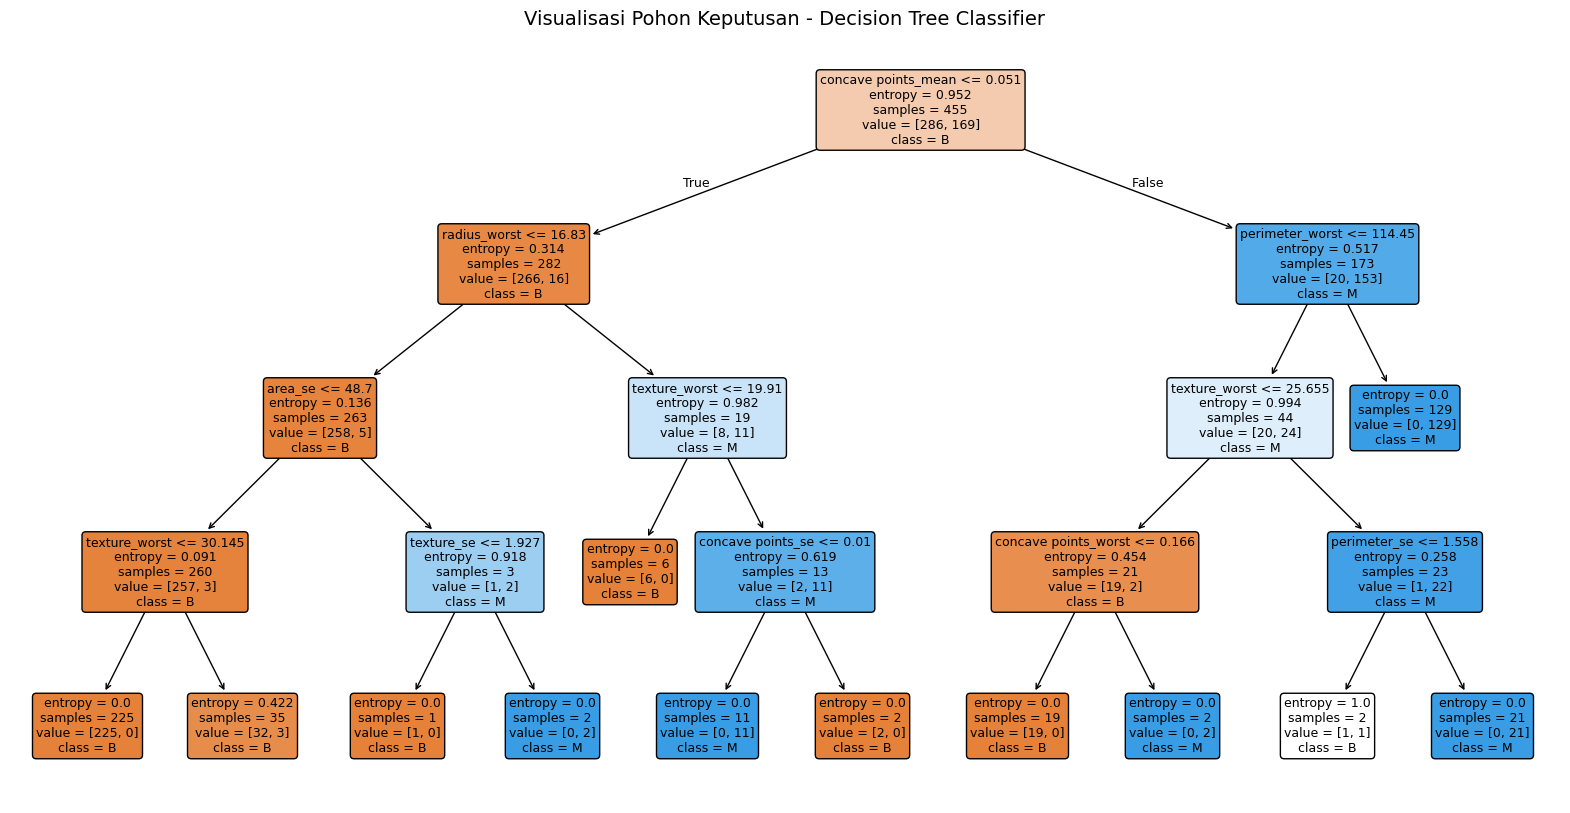

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=le.classes_,
    filled=True,
    rounded=True,
    fontsize=9
)
plt.title("Visualisasi Pohon Keputusan - Decision Tree Classifier", fontsize=14)
plt.show()